In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2014-01-01'
end = '2024-10-24'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)

In [9]:
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-01-02 00:00:00+00:00,27.656164,27.724083,27.839401,27.603037,27.782366,73129082
1,2014-01-03 00:00:00+00:00,27.454418,27.521841,27.818977,27.520098,27.770908,66917888
2,2014-01-06 00:00:00+00:00,27.760517,27.828691,27.867046,27.557707,27.721344,71037271
3,2014-01-07 00:00:00+00:00,28.295689,28.365179,28.385853,27.924334,28.019974,102486711
4,2014-01-08 00:00:00+00:00,28.354576,28.424210,28.575891,28.226450,28.543015,90036218
...,...,...,...,...,...,...,...
2716,2024-10-17 00:00:00+00:00,164.509995,164.509995,167.929993,164.369995,167.380005,15113400
2717,2024-10-18 00:00:00+00:00,165.050003,165.050003,166.369995,164.750000,164.869995,13091300
2718,2024-10-21 00:00:00+00:00,165.800003,165.800003,166.220001,164.304993,164.580002,11384000
2719,2024-10-22 00:00:00+00:00,166.820007,166.820007,167.470001,164.669998,164.699997,11958600


In [11]:
ma_100_days = data.Close.rolling(100).mean()

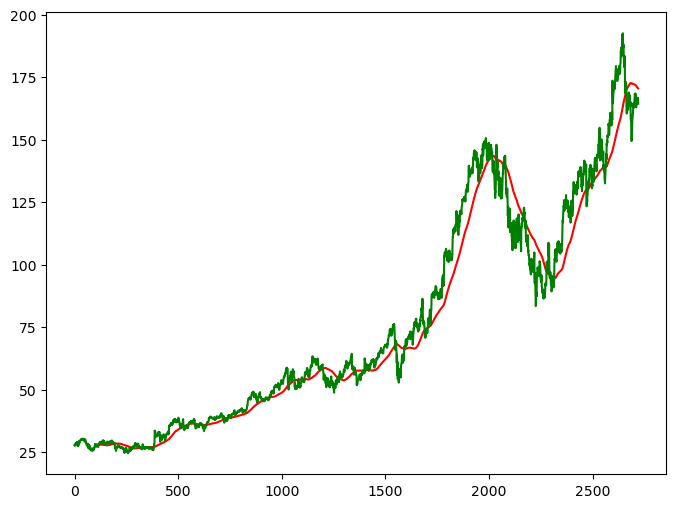

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [15]:
ma_200_days = data.Close.rolling(200).mean()

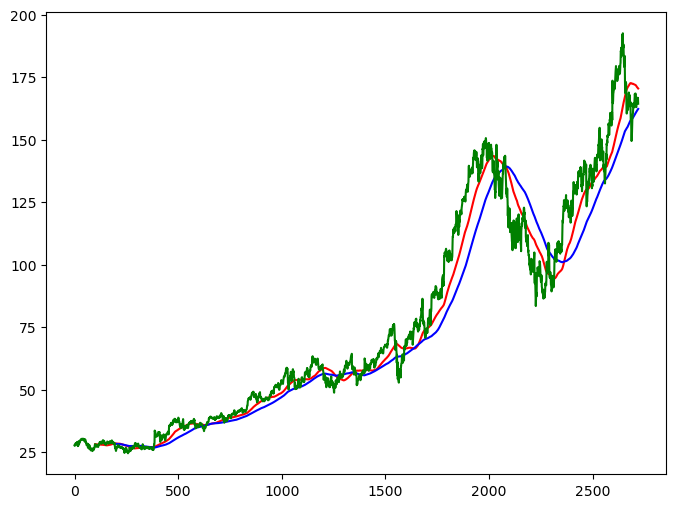

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [19]:
data.dropna(inplace=True)

In [21]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [23]:
data_train.shape[0]

2176

In [25]:
data_test.shape[0]

545

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_train_scale = scaler.fit_transform(data_train)

In [29]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [30]:
x, y = np.array(x), np.array(y)

In [39]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [41]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [45]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0676
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0071
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0053
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0052
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0057
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0036
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0048
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0043
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0045
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0045
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0042
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0037
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0033
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0035
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0037
Epoc

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [49]:
pas_100_days = data_train.tail(100)

In [51]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [53]:
data_test_scale  =  scaler.fit_transform(data_test)

In [55]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [59]:
scale =1/scaler.scale_

In [61]:
y_predict = y_predict*scale

In [63]:
y = y*scale

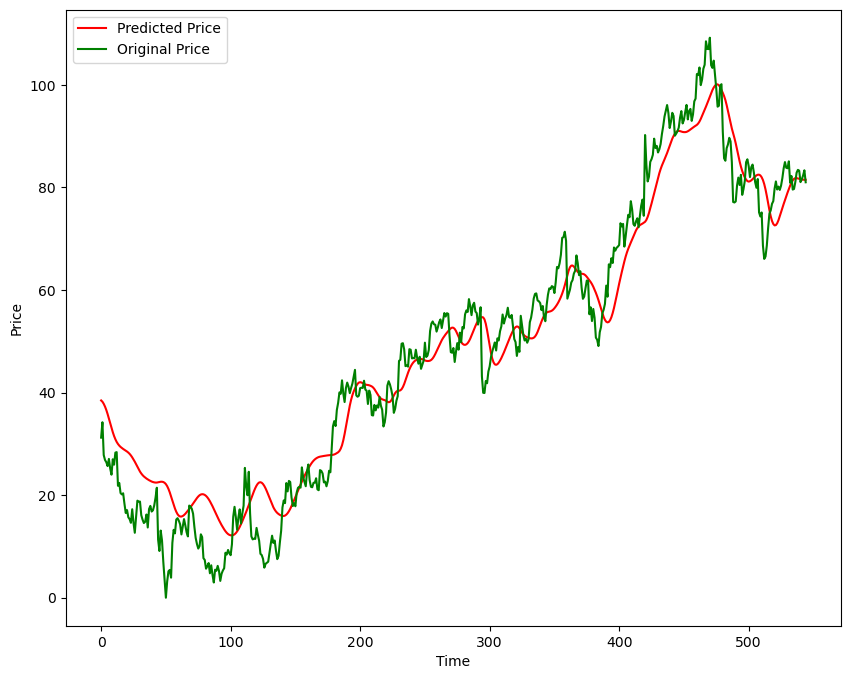

In [65]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [67]:
model.save('Stock Predictions Model.keras')